In [33]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.parameters = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, method="gd"):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        self.parameters = np.zeros(X.shape[1])
        if method == "gd":
            self._gradient_descent(X, y)
        elif method == "sgd":
            self._stochastic_gradient_descent(X, y)
        elif method == "newton":
            self._newton_method(X, y)

    def _gradient_descent(self, X, y):
        for _ in range(self.epochs):
            y_pred = self.sigmoid(X.dot(self.parameters))
            gradient = X.T.dot(y_pred - y) / y.size
            self.parameters -= self.learning_rate * gradient
            
        print("Parameters (GD):", self.parameters)

    def _stochastic_gradient_descent(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.sigmoid(X[i].dot(self.parameters))
                gradient = (y_pred - y[i]) * X[i]
                self.parameters -= self.learning_rate * gradient
        print("Parameters (SGD):", self.parameters)

    def _newton_method(self, X, y, tol=1e-2):
        n, m = X.shape
        #parameters = np.zeros(m)  # Parametri iniziali

        for _ in range(self.epochs):
            p = self.sigmoid(X.dot(self.parameters))  # Probabilità predetta
            W = np.diag(p * (1 - p))  # Matrice diagonale dei pesi
            gradient = 1/n *(X.T @ (y - p))  # Gradiente della log-verosimiglianza
            hessian = 1/n *(X.T @ W @ X)  # Matrice Hessiana
            
            if np.linalg.det(hessian) == 0:  # Controllo per evitare inversione errata
                print("Hessiana singolare, interruzione.")
                print("Epoca:", _)
                break
            
            parameters_update = np.linalg.inv(hessian) @ gradient  # Aggiornamento con Newton
            self.parameters += parameters_update  # Aggiorna parametri
            
            if np.linalg.norm(parameters_update) < tol:  # Criterio di arresto
                break

        print("Parameters (Newton):", self.parameters)

    def predict_proba(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return self.sigmoid(X.dot(self.parameters))

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

Parameters (GD): [0.56923962 1.57413739]
Parameters (SGD): [0.48870764 2.54421831]
Parameters (Newton): [0.56928374 1.57421908]


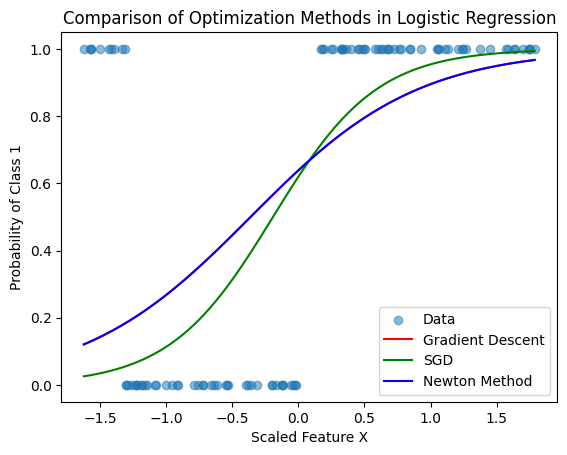

In [38]:
from sklearn.preprocessing import StandardScaler

# Generate complex dataset
np.random.seed(42)
# Dati di esempio
np.random.seed(0)
X = np.sort(5 * np.random.rand(100))
y = (X > 2.5).astype(int)
y[:10] = 1 - y[:10]  # Introduce some noise

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

# Train models
model_gd = LogisticRegression()
model_gd.fit(X_scaled, y, method="gd")

model_sgd = LogisticRegression()
model_sgd.fit(X_scaled, y, method="sgd")

model_newton = LogisticRegression()
model_newton.fit(X_scaled, y, method="newton")

# Plot results
plt.scatter(X_scaled, y, label='Data', alpha=0.5)
X_vals = np.linspace(min(X_scaled), max(X_scaled), 100)
y_vals_gd = model_gd.predict_proba(X_vals)
y_vals_sgd = model_sgd.predict_proba(X_vals)
y_vals_newton = model_newton.predict_proba(X_vals)

plt.plot(X_vals, y_vals_gd, color='red', label='Gradient Descent')
plt.plot(X_vals, y_vals_sgd, color='green', label='SGD')
plt.plot(X_vals, y_vals_newton, color='blue', label='Newton Method')
plt.legend()
plt.xlabel("Scaled Feature X")
plt.ylabel("Probability of Class 1")
plt.title("Comparison of Optimization Methods in Logistic Regression")
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def evaluate_model(model, X, y, method_name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    logloss = log_loss(y, y_proba)
    
    print(f"=== {method_name} Evaluation ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print("-" * 30)

# Valutazione dei modelli
evaluate_model(model_gd, X_scaled, y, "Gradient Descent")
evaluate_model(model_sgd, X_scaled, y, "SGD")
evaluate_model(model_newton, X_scaled, y, "Newton Method")

=== Gradient Descent Evaluation ===
Accuracy: 0.7800
Precision: 0.8033
Recall: 0.8305
F1 Score: 0.8167
Log Loss: 0.4844
------------------------------
=== SGD Evaluation ===
Accuracy: 0.8200
Precision: 0.8596
Recall: 0.8305
F1 Score: 0.8448
Log Loss: 0.5276
------------------------------
=== Newton Method Evaluation ===
Accuracy: 0.7800
Precision: 0.8033
Recall: 0.8305
F1 Score: 0.8167
Log Loss: 0.4844
------------------------------
